normaliz by tornado vs by all data


loss indeviduall vs combined
different models
prediting both vs one by one
latitude langitude vs polar
sequence lenth
additional features
fine tune finnaly

In [ ]:
from google.colab import drive
import zipfile
import pandas as pd
import numpy as np

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/time series project/data.csv')
df.head()

Mounted at /content/drive


,ID,Name,Date,Latitude,Longitude,Pressure,Wind Owd
0,66666 0000 49 0001 0000,Carmen,1949011300,57,1399,1006,0
1,66666 0000 49 0001 0000,Carmen,1949011306,59,1393,1006,0
2,66666 0000 49 0001 0000,Carmen,1949011312,63,1387,1006,0
3,66666 0000 49 0001 0000,Carmen,1949011318,67,1380,1006,0
4,66666 0000 49 0001 0000,Carmen,1949011400,72,1373,1005,0


In [ ]:
print(df['Latitude'].min())
print(df['Longitude'].min())
print(df['Latitude'].max())
print(df['Longitude'].max())

5
950
701
2550


In [ ]:
print(df[df['Longitude']==2550])

                            ID  Name        Date  Latitude  Longitude  \
72036  66666 2308 86 0009 2308  DORA  2023080100       152       2550   

       Pressure  Wind Owd  
72036      1005        15  


In [ ]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        # Input sequence with both lat and long
        x = data[i:i + seq_length][['Latitude', 'Longitude']].values
        # Output is both lat and long for the next position
        y = data.iloc[i + seq_length][['Latitude', 'Longitude']].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Normalize the coordinates
scaler = MinMaxScaler()
df[['Latitude', 'Longitude']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

seq_length = 10  # You can adjust this
X_train, y_train, X_test, y_test = [], [], [], []

# Loop through each tornado
for tornado_id, group in df.groupby('ID'):
    group = group.reset_index(drop=True)
    split_idx = int(len(group) * 0.7)
    train_group = group[:split_idx]
    test_group = group[split_idx:]

    x_tr, y_tr = create_sequences(train_group, seq_length)
    x_te, y_te = create_sequences(test_group, seq_length)

    # Check if sequences were generated before appending
    if x_tr.size > 0 and x_te.size > 0:  # Check if arrays are not empty
        X_train.append(x_tr)
        y_train.append(y_tr)
        X_test.append(x_te)
        y_test.append(y_te)

# Concatenate all sequences, ensuring dtype consistency
X_train = np.concatenate(X_train).astype(np.float32)
y_train = np.concatenate(y_train).astype(np.float32)
X_test = np.concatenate(X_test).astype(np.float32)
y_test = np.concatenate(y_test).astype(np.float32)

In [ ]:
def build_model(seq_length):
    model = Sequential([
        # Input shape: [sequence_length, 2] (lat and long for each time step)
        LSTM(64, return_sequences=True, input_shape=(seq_length, 2)),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        # Output shape: [2] (predicted lat and long)
        Dense(2)
    ])

    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Dropout
import tensorflow as tf # Import tensorflow
import matplotlib.pyplot as plt

In [ ]:
# Build and train model
model = build_model(10)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

# Make predictions
predictions = model.predict(X_test)
predicted_lat = predictions[:, 0]
predicted_lon = predictions[:, 1]

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


442/442 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0071 - mae: 0.0575 - val_loss: 5.3153e-04 - val_mae: 0.0182
Epoch 2/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0020 - mae: 0.0301 - val_loss: 3.4922e-04 - val_mae: 0.0149
Epoch 3/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0014 - mae: 0.0237 - val_loss: 2.3085e-04 - val_mae: 0.0113
Epoch 4/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0011 - mae: 0.0197 - val_loss: 1.4975e-04 - val_mae: 0.0093
Epoch 5/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0010 - mae: 0.0179 - val_loss: 1.8392e-04 - val_mae: 0.0103
Epoch 6/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 7.2485e-04 - mae: 0.0154 - val_loss: 9.6796e-05 - val_mae: 0.0072
Epoch 7/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 6.1623e-04 - mae: 0.0143 - val_loss: 2.0164e-04 - val_mae: 0.0119
Epoch 8/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 6.2802e-04 - mae: 0.0143 - val_loss: 7.1276e-05 - val_mae: 0.0062
Epoch 9/50
4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


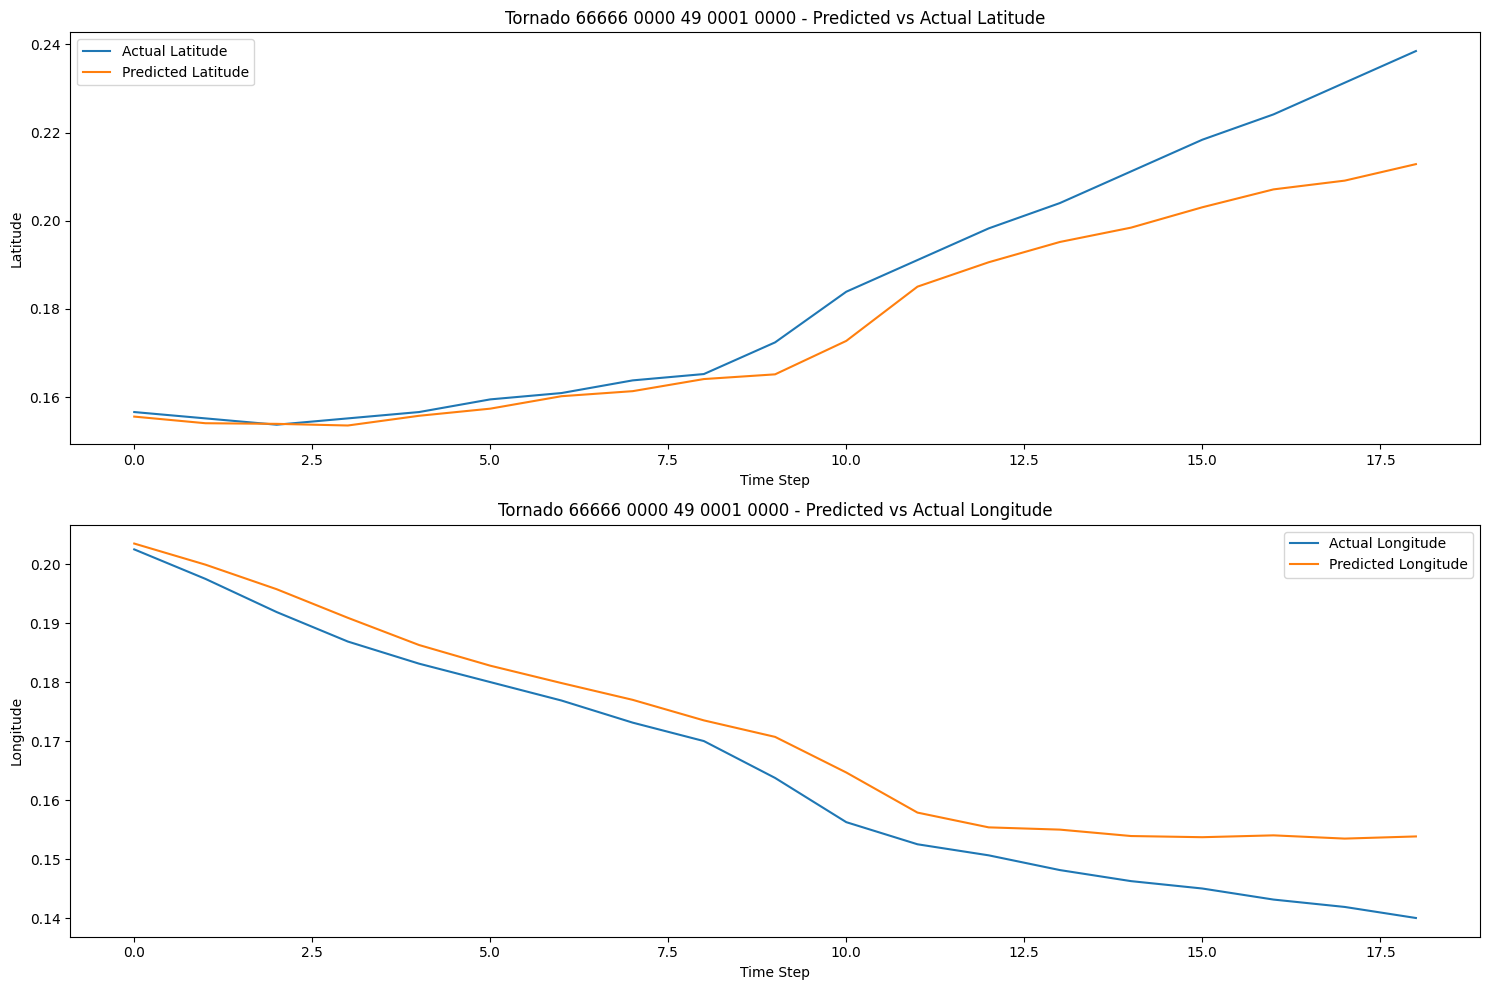

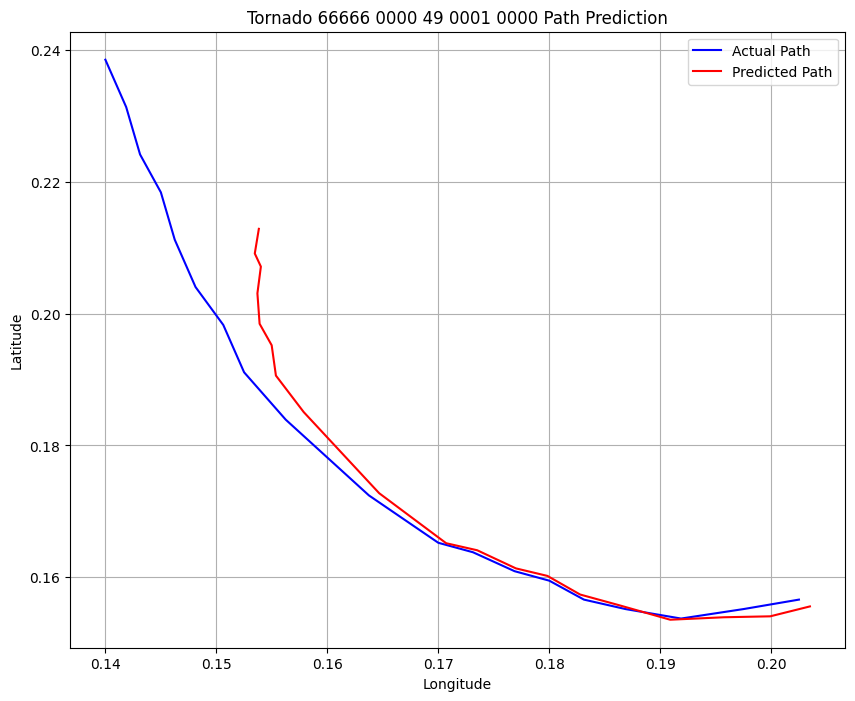

Latitude RMSE: 0.010777
Longitude RMSE: 0.006836
Latitude MAE: 0.007637
Longitude MAE: 0.005926
Mean Distance Error: 0.009977 degrees


In [ ]:
# Select a specific tornado by its ID
target_id = "66666 0000 49 0001 0000"  # replace with the tornado ID you want
target_data = df[df['ID'] == target_id].reset_index(drop=True)

# Split into train/test based on a 40/60 split
split_idx = int(len(target_data) * 0.4)
test_data = target_data[split_idx:].reset_index(drop=True)

# Create a MinMaxScaler specific to this tornado's data
tornado_scaler = MinMaxScaler()
tornado_scaler.fit(target_data[['Latitude', 'Longitude']].values)

# Scale test data
scaled_test_data = test_data.copy()
scaled_test_data[['Latitude', 'Longitude']] = tornado_scaler.transform(test_data[['Latitude', 'Longitude']].values)

# Create sequences for the test part of this tornado (modified to include both lat and long)
def create_seq_both(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:i + seq_length][['Latitude', 'Longitude']].values
        y = data.iloc[i + seq_length][['Latitude', 'Longitude']].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_target_test, y_target_test = create_seq_both(scaled_test_data, seq_length)

# Predict both coordinates
y_target_pred = model.predict(X_target_test)

# Inverse transform predictions and actual values (for both coordinates)
y_target_pred_inv = tornado_scaler.inverse_transform(y_target_pred)
y_target_test_inv = tornado_scaler.inverse_transform(y_target_test)

# Plot the prediction vs actual for both coordinates
plt.figure(figsize=(15, 10))

# Plot Latitude
plt.subplot(2, 1, 1)
plt.plot(y_target_test_inv[:, 0], label='Actual Latitude')
plt.plot(y_target_pred_inv[:, 0], label='Predicted Latitude')
plt.title(f"Tornado {target_id} - Predicted vs Actual Latitude")
plt.xlabel('Time Step')
plt.ylabel('Latitude')
plt.legend()

# Plot Longitude
plt.subplot(2, 1, 2)
plt.plot(y_target_test_inv[:, 1], label='Actual Longitude')
plt.plot(y_target_pred_inv[:, 1], label='Predicted Longitude')
plt.title(f"Tornado {target_id} - Predicted vs Actual Longitude")
plt.xlabel('Time Step')
plt.ylabel('Longitude')
plt.legend()

plt.tight_layout()
plt.show()

# Also plot the trajectory on a map
plt.figure(figsize=(10, 8))
plt.plot(y_target_test_inv[:, 1], y_target_test_inv[:, 0], 'b-', label='Actual Path')
plt.plot(y_target_pred_inv[:, 1], y_target_pred_inv[:, 0], 'r-', label='Predicted Path')
plt.title(f'Tornado {target_id} Path Prediction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE for both coordinates
lat_rmse = np.sqrt(mean_squared_error(y_target_test_inv[:, 0], y_target_pred_inv[:, 0]))
lon_rmse = np.sqrt(mean_squared_error(y_target_test_inv[:, 1], y_target_pred_inv[:, 1]))

# Calculate MAE for both coordinates
lat_mae = mean_absolute_error(y_target_test_inv[:, 0], y_target_pred_inv[:, 0])
lon_mae = mean_absolute_error(y_target_test_inv[:, 1], y_target_pred_inv[:, 1])

# Calculate Euclidean distance error (overall position error)
euclidean_errors = np.sqrt(
    (y_target_test_inv[:, 0] - y_target_pred_inv[:, 0])**2 +
    (y_target_test_inv[:, 1] - y_target_pred_inv[:, 1])**2
)
mean_distance_error = np.mean(euclidean_errors)

print(f"Latitude RMSE: {lat_rmse:.6f}")
print(f"Longitude RMSE: {lon_rmse:.6f}")
print(f"Latitude MAE: {lat_mae:.6f}")
print(f"Longitude MAE: {lon_mae:.6f}")
print(f"Mean Distance Error: {mean_distance_error:.6f} degrees")

In [ ]:
def euclidean_distance_loss(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(
        tf.square(y_true[:, 0] - y_pred[:, 0]) +
        tf.square(y_true[:, 1] - y_pred[:, 1])
    ))

def build_model(seq_length):
    model = Sequential([
        # Input shape: [sequence_length, 2] (lat and long for each time step)
        LSTM(64, return_sequences=True, input_shape=(seq_length, 2)),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        # Output shape: [2] (predicted lat and long)
        Dense(2)
    ])


    model.compile(
    optimizer='adam',
    loss=euclidean_distance_loss,
    metrics=['mae']
    )
    return model

In [ ]:
# Build and train model
model = build_model(10)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.3
)

# Make predictions
predictions = model.predict(X_test)
predicted_lat = predictions[:, 0]
predicted_lon = predictions[:, 1]

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0930 - mae: 0.0605 - val_loss: 0.0261 - val_mae: 0.0167
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0415 - mae: 0.0267 - val_loss: 0.0168 - val_mae: 0.0106
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0322 - mae: 0.0206 - val_loss: 0.0130 - val_mae: 0.0083
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0261 - mae: 0.0167 - val_loss: 0.0110 - val_mae: 0.0070
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0233 - mae: 0.0148 - val_loss: 0.0103 - val_mae: 0.0064
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0215 - mae: 0.0137 - val_loss: 0.0095 - val_mae: 0.0061
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0209 - mae: 0.0132 - val_loss: 0.0079 - val_mae: 0.0051
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0204 - mae: 0.0130 - val_loss: 0.0081 - val_mae: 0.0051
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


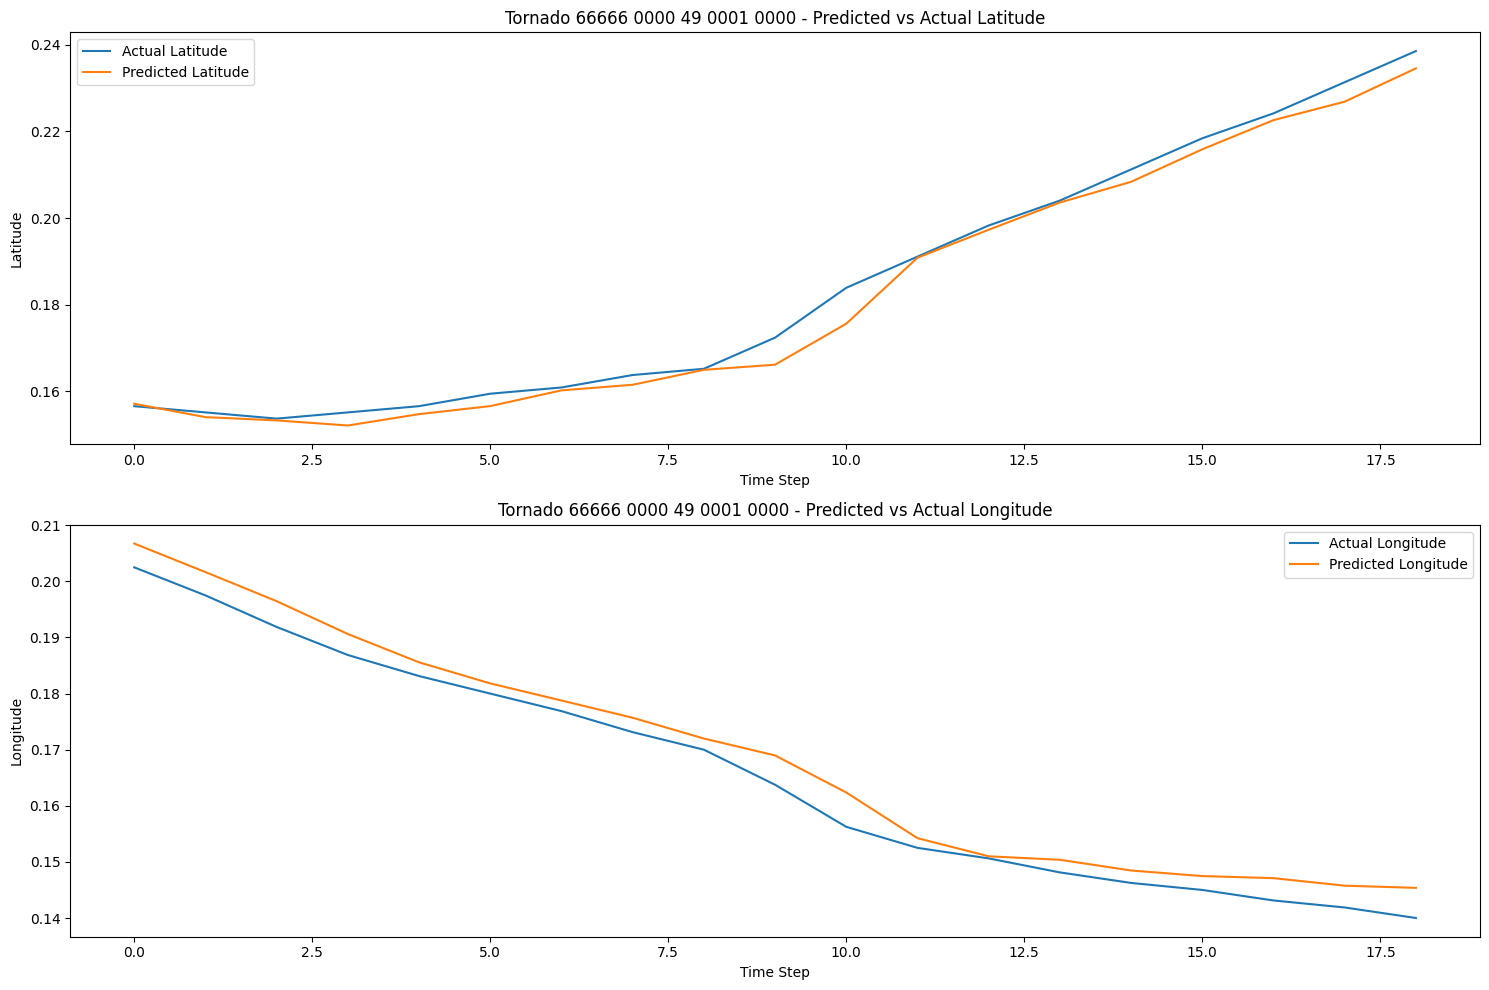

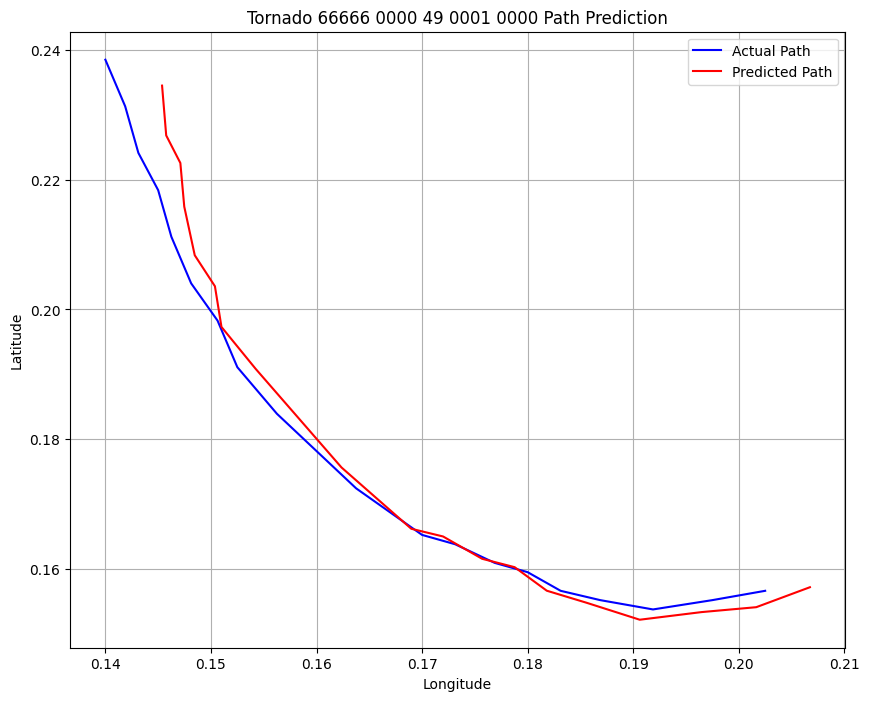

Latitude RMSE: 0.003160
Longitude RMSE: 0.003535
Latitude MAE: 0.002345
Longitude MAE: 0.003213
Mean Distance Error: 0.004181 degrees


In [ ]:
# Select a specific tornado by its ID
target_id = "66666 0000 49 0001 0000"  # replace with the tornado ID you want
target_data = df[df['ID'] == target_id].reset_index(drop=True)

# Split into train/test based on a 40/60 split
split_idx = int(len(target_data) * 0.4)
test_data = target_data[split_idx:].reset_index(drop=True)

# Create a MinMaxScaler specific to this tornado's data
tornado_scaler = MinMaxScaler()
tornado_scaler.fit(target_data[['Latitude', 'Longitude']].values)

# Scale test data
scaled_test_data = test_data.copy()
scaled_test_data[['Latitude', 'Longitude']] = tornado_scaler.transform(test_data[['Latitude', 'Longitude']].values)

# Create sequences for the test part of this tornado (modified to include both lat and long)
def create_seq_both(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:i + seq_length][['Latitude', 'Longitude']].values
        y = data.iloc[i + seq_length][['Latitude', 'Longitude']].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_target_test, y_target_test = create_seq_both(scaled_test_data, seq_length)

# Predict both coordinates
y_target_pred = model.predict(X_target_test)

# Inverse transform predictions and actual values (for both coordinates)
y_target_pred_inv = tornado_scaler.inverse_transform(y_target_pred)
y_target_test_inv = tornado_scaler.inverse_transform(y_target_test)

# Plot the prediction vs actual for both coordinates
plt.figure(figsize=(15, 10))

# Plot Latitude
plt.subplot(2, 1, 1)
plt.plot(y_target_test_inv[:, 0], label='Actual Latitude')
plt.plot(y_target_pred_inv[:, 0], label='Predicted Latitude')
plt.title(f"Tornado {target_id} - Predicted vs Actual Latitude")
plt.xlabel('Time Step')
plt.ylabel('Latitude')
plt.legend()

# Plot Longitude
plt.subplot(2, 1, 2)
plt.plot(y_target_test_inv[:, 1], label='Actual Longitude')
plt.plot(y_target_pred_inv[:, 1], label='Predicted Longitude')
plt.title(f"Tornado {target_id} - Predicted vs Actual Longitude")
plt.xlabel('Time Step')
plt.ylabel('Longitude')
plt.legend()

plt.tight_layout()
plt.show()

# Also plot the trajectory on a map
plt.figure(figsize=(10, 8))
plt.plot(y_target_test_inv[:, 1], y_target_test_inv[:, 0], 'b-', label='Actual Path')
plt.plot(y_target_pred_inv[:, 1], y_target_pred_inv[:, 0], 'r-', label='Predicted Path')
plt.title(f'Tornado {target_id} Path Prediction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE for both coordinates
lat_rmse = np.sqrt(mean_squared_error(y_target_test_inv[:, 0], y_target_pred_inv[:, 0]))
lon_rmse = np.sqrt(mean_squared_error(y_target_test_inv[:, 1], y_target_pred_inv[:, 1]))

# Calculate MAE for both coordinates
lat_mae = mean_absolute_error(y_target_test_inv[:, 0], y_target_pred_inv[:, 0])
lon_mae = mean_absolute_error(y_target_test_inv[:, 1], y_target_pred_inv[:, 1])

# Calculate Euclidean distance error (overall position error)
euclidean_errors = np.sqrt(
    (y_target_test_inv[:, 0] - y_target_pred_inv[:, 0])**2 +
    (y_target_test_inv[:, 1] - y_target_pred_inv[:, 1])**2
)
mean_distance_error = np.mean(euclidean_errors)

print(f"Latitude RMSE: {lat_rmse:.6f}")
print(f"Longitude RMSE: {lon_rmse:.6f}")
print(f"Latitude MAE: {lat_mae:.6f}")
print(f"Longitude MAE: {lon_mae:.6f}")
print(f"Mean Distance Error: {mean_distance_error:.6f} degrees")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:i + seq_length][['Latitude', 'Longitude']].values
        y = data.iloc[i + seq_length][['Latitude', 'Longitude']].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_train, y_train, X_test, y_test = [], [], [], []

# Optional: save scalers for each tornado if you want to inverse-transform predictions later
scalers = {}

for tornado_id, group in df.groupby('ID'):
    group = group.reset_index(drop=True)

    # Standardize per tornado
    scaler = MinMaxScaler()
    group[['Latitude', 'Longitude']] = scaler.fit_transform(group[['Latitude', 'Longitude']])
    scalers[tornado_id] = scaler  # Save the scaler if you need it later

    split_idx = int(len(group) * 0.7)
    train_group = group[:split_idx]
    test_group = group[split_idx:]

    x_tr, y_tr = create_sequences(train_group, seq_length)
    x_te, y_te = create_sequences(test_group, seq_length)

    if x_tr.size > 0 and x_te.size > 0:
        X_train.append(x_tr)
        y_train.append(y_tr)
        X_test.append(x_te)
        y_test.append(y_te)

# Concatenate all sequences
X_train = np.concatenate(X_train).astype(np.float32)
y_train = np.concatenate(y_train).astype(np.float32)
X_test = np.concatenate(X_test).astype(np.float32)
y_test = np.concatenate(y_test).astype(np.float32)


In [ ]:
# Build and train model
model = build_model(10)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.3
)

# Make predictions
predictions = model.predict(X_test)
predicted_lat = predictions[:, 0]
predicted_lon = predictions[:, 1]

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.1963 - mae: 0.1255 - val_loss: 0.0617 - val_mae: 0.0389
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0928 - mae: 0.0592 - val_loss: 0.0412 - val_mae: 0.0261
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0747 - mae: 0.0478 - val_loss: 0.0332 - val_mae: 0.0210
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0672 - mae: 0.0430 - val_loss: 0.0323 - val_mae: 0.0204
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0597 - mae: 0.0381 - val_loss: 0.0323 - val_mae: 0.0206
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0583 - mae: 0.0372 - val_loss: 0.0267 - val_mae: 0.0172
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0563 - mae: 0.0362 - val_loss: 0.0312 - val_mae: 0.0196
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0554 - mae: 0.0355 - val_loss: 0.0251 - val_mae: 0.0161
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


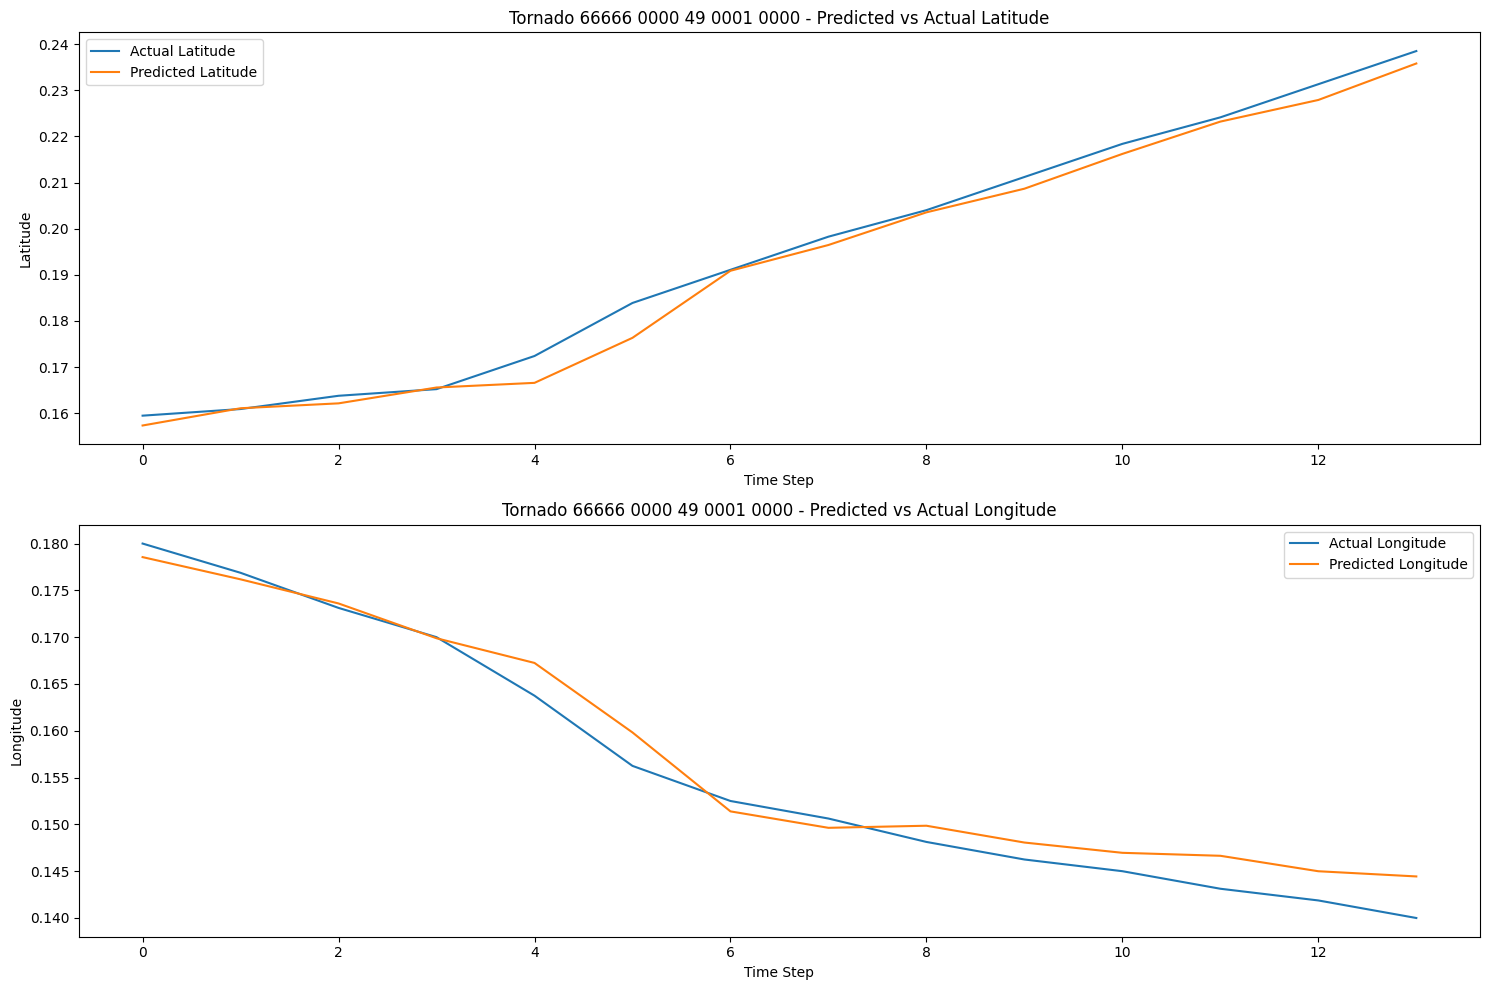

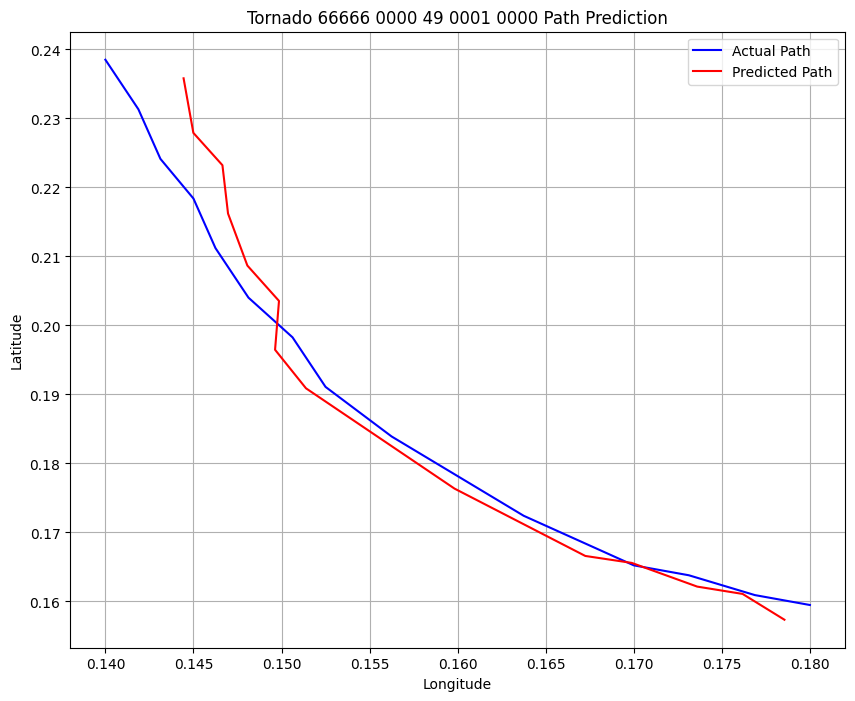

Latitude RMSE: 0.003080
Longitude RMSE: 0.002420
Latitude MAE: 0.002278
Longitude MAE: 0.002035
Mean Distance Error: 0.003215 degrees


In [ ]:
# Select a specific tornado by its ID
target_id = "66666 0000 49 0001 0000"  # replace with the tornado ID you want
target_data = df[df['ID'] == target_id].reset_index(drop=True)

# Split into train/test based on a 40/60 split
split_idx = int(len(target_data) * 0.5)
test_data = target_data[split_idx:].reset_index(drop=True)

# Create a MinMaxScaler specific to this tornado's data
tornado_scaler = MinMaxScaler()
tornado_scaler.fit(target_data[['Latitude', 'Longitude']].values)

# Scale test data
scaled_test_data = test_data.copy()
scaled_test_data[['Latitude', 'Longitude']] = tornado_scaler.transform(test_data[['Latitude', 'Longitude']].values)

# Create sequences for the test part of this tornado (modified to include both lat and long)
def create_seq_both(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:i + seq_length][['Latitude', 'Longitude']].values
        y = data.iloc[i + seq_length][['Latitude', 'Longitude']].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_target_test, y_target_test = create_seq_both(scaled_test_data, seq_length)

# Predict both coordinates
y_target_pred = model.predict(X_target_test)

# Inverse transform predictions and actual values (for both coordinates)
y_target_pred_inv = tornado_scaler.inverse_transform(y_target_pred)
y_target_test_inv = tornado_scaler.inverse_transform(y_target_test)

# Plot the prediction vs actual for both coordinates
plt.figure(figsize=(15, 10))

# Plot Latitude
plt.subplot(2, 1, 1)
plt.plot(y_target_test_inv[:, 0], label='Actual Latitude')
plt.plot(y_target_pred_inv[:, 0], label='Predicted Latitude')
plt.title(f"Tornado {target_id} - Predicted vs Actual Latitude")
plt.xlabel('Time Step')
plt.ylabel('Latitude')
plt.legend()

# Plot Longitude
plt.subplot(2, 1, 2)
plt.plot(y_target_test_inv[:, 1], label='Actual Longitude')
plt.plot(y_target_pred_inv[:, 1], label='Predicted Longitude')
plt.title(f"Tornado {target_id} - Predicted vs Actual Longitude")
plt.xlabel('Time Step')
plt.ylabel('Longitude')
plt.legend()

plt.tight_layout()
plt.show()

# Also plot the trajectory on a map
plt.figure(figsize=(10, 8))
plt.plot(y_target_test_inv[:, 1], y_target_test_inv[:, 0], 'b-', label='Actual Path')
plt.plot(y_target_pred_inv[:, 1], y_target_pred_inv[:, 0], 'r-', label='Predicted Path')
plt.title(f'Tornado {target_id} Path Prediction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE for both coordinates
lat_rmse = np.sqrt(mean_squared_error(y_target_test_inv[:, 0], y_target_pred_inv[:, 0]))
lon_rmse = np.sqrt(mean_squared_error(y_target_test_inv[:, 1], y_target_pred_inv[:, 1]))

# Calculate MAE for both coordinates
lat_mae = mean_absolute_error(y_target_test_inv[:, 0], y_target_pred_inv[:, 0])
lon_mae = mean_absolute_error(y_target_test_inv[:, 1], y_target_pred_inv[:, 1])

# Calculate Euclidean distance error (overall position error)
euclidean_errors = np.sqrt(
    (y_target_test_inv[:, 0] - y_target_pred_inv[:, 0])**2 +
    (y_target_test_inv[:, 1] - y_target_pred_inv[:, 1])**2
)
mean_distance_error = np.mean(euclidean_errors)

print(f"Latitude RMSE: {lat_rmse:.6f}")
print(f"Longitude RMSE: {lon_rmse:.6f}")
print(f"Latitude MAE: {lat_mae:.6f}")
print(f"Longitude MAE: {lon_mae:.6f}")
print(f"Mean Distance Error: {mean_distance_error:.6f} degrees")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/

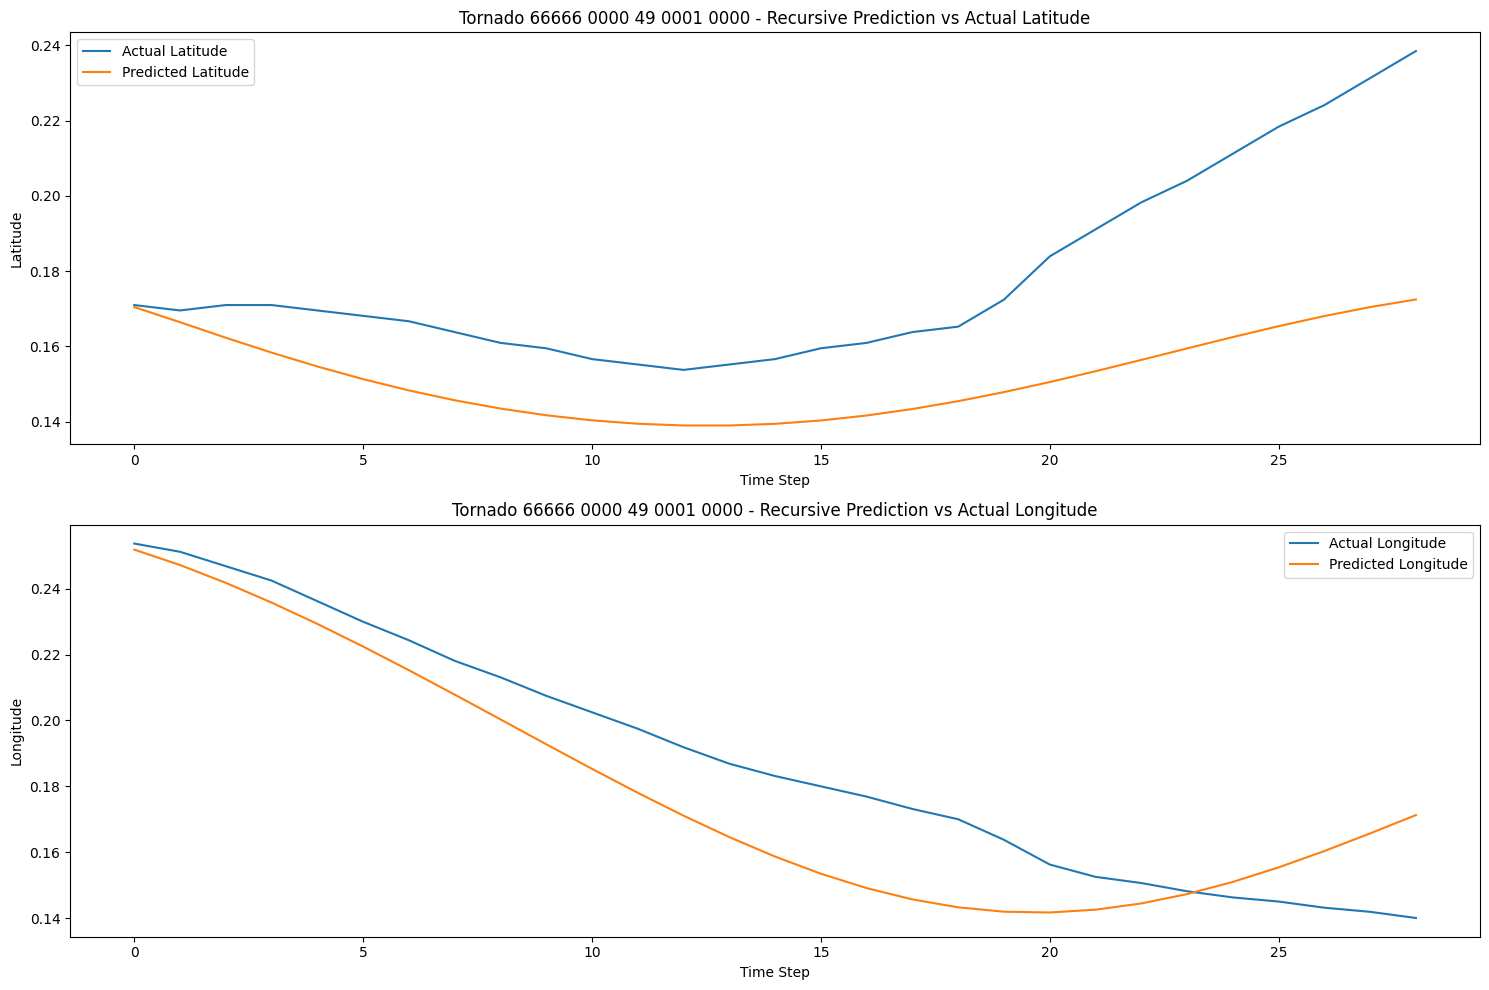

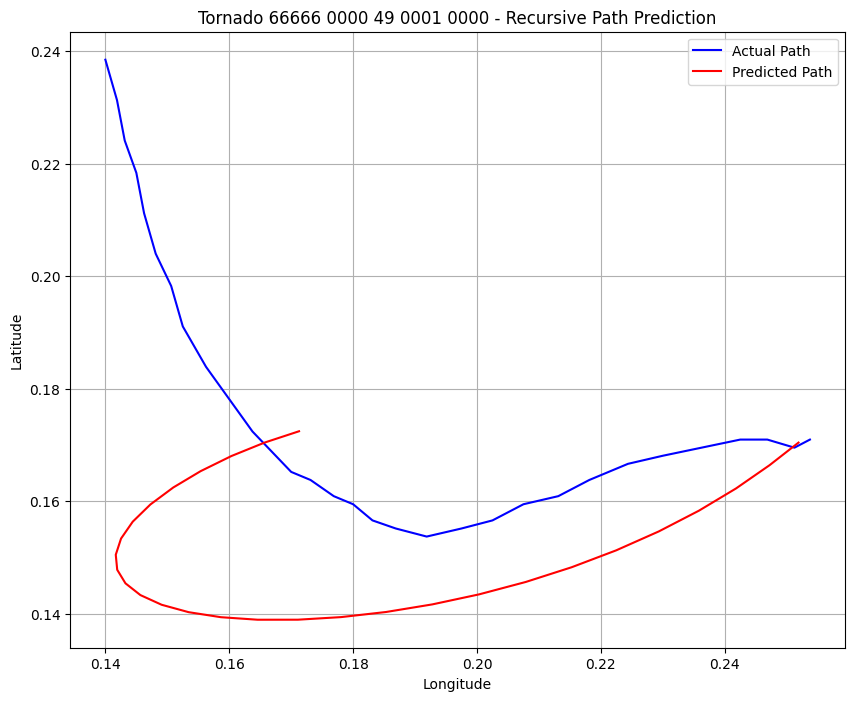

Recursive Prediction Results:
Latitude RMSE: 0.031166
Longitude RMSE: 0.017333
Latitude MAE: 0.026016
Longitude MAE: 0.014915
Mean Distance Error: 0.031502 degrees


In [ ]:
# Select a specific tornado by its ID
target_id = "66666 0000 49 0001 0000"  # replace with the tornado ID you want
target_data = df[df['ID'] == target_id].reset_index(drop=True)

# Split into train/test based on a 40/60 split
split_idx = int(len(target_data) * 0.4)
train_data = target_data[:split_idx].reset_index(drop=True)
test_data = target_data[split_idx:].reset_index(drop=True)

# Create a MinMaxScaler specific to this tornado's data
tornado_scaler = MinMaxScaler()
tornado_scaler.fit(target_data[['Latitude', 'Longitude']].values)

# Scale both train and test data
scaled_train_data = train_data.copy()
scaled_train_data[['Latitude', 'Longitude']] = tornado_scaler.transform(train_data[['Latitude', 'Longitude']].values)

scaled_test_data = test_data.copy()
scaled_test_data[['Latitude', 'Longitude']] = tornado_scaler.transform(test_data[['Latitude', 'Longitude']].values)

# Get the last sequence from training data to start the recursive prediction
last_sequence = scaled_train_data.iloc[-seq_length:][['Latitude', 'Longitude']].values
last_sequence = last_sequence.reshape(1, seq_length, 2)  # Reshape for model input

# Set up recursive prediction
recursive_predictions = []
current_sequence = last_sequence.copy()

# Recursively predict for the number of test data points
for _ in range(len(test_data) - 1):  # -1 because we need at least one point to compare with
    # Predict next position
    next_position = model.predict(current_sequence)

    # Store prediction
    recursive_predictions.append(next_position[0])

    # Update sequence for next prediction (remove oldest, add prediction)
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1, :] = next_position[0]

# Convert predictions to numpy array
recursive_predictions = np.array(recursive_predictions)

# Inverse transform predictions to get actual coordinates
recursive_pred_inv = tornado_scaler.inverse_transform(recursive_predictions)

# Get actual test values for comparison
actual_test_values = test_data[['Latitude', 'Longitude']].values[:-1]  # -1 to match predictions length

# Plot the recursive prediction vs actual
plt.figure(figsize=(15, 10))

# Plot Latitude
plt.subplot(2, 1, 1)
plt.plot(actual_test_values[:, 0], label='Actual Latitude')
plt.plot(recursive_pred_inv[:, 0], label='Predicted Latitude')
plt.title(f"Tornado {target_id} - Recursive Prediction vs Actual Latitude")
plt.xlabel('Time Step')
plt.ylabel('Latitude')
plt.legend()

# Plot Longitude
plt.subplot(2, 1, 2)
plt.plot(actual_test_values[:, 1], label='Actual Longitude')
plt.plot(recursive_pred_inv[:, 1], label='Predicted Longitude')
plt.title(f"Tornado {target_id} - Recursive Prediction vs Actual Longitude")
plt.xlabel('Time Step')
plt.ylabel('Longitude')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the trajectory on a map
plt.figure(figsize=(10, 8))
plt.plot(actual_test_values[:, 1], actual_test_values[:, 0], 'b-', label='Actual Path')
plt.plot(recursive_pred_inv[:, 1], recursive_pred_inv[:, 0], 'r-', label='Predicted Path')
plt.title(f'Tornado {target_id} - Recursive Path Prediction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE for both coordinates
lat_rmse = np.sqrt(mean_squared_error(actual_test_values[:, 0], recursive_pred_inv[:, 0]))
lon_rmse = np.sqrt(mean_squared_error(actual_test_values[:, 1], recursive_pred_inv[:, 1]))

# Calculate MAE for both coordinates
lat_mae = mean_absolute_error(actual_test_values[:, 0], recursive_pred_inv[:, 0])
lon_mae = mean_absolute_error(actual_test_values[:, 1], recursive_pred_inv[:, 1])

# Calculate Euclidean distance error (overall position error)
euclidean_errors = np.sqrt(
    (actual_test_values[:, 0] - recursive_pred_inv[:, 0])**2 +
    (actual_test_values[:, 1] - recursive_pred_inv[:, 1])**2
)
mean_distance_error = np.mean(euclidean_errors)

print(f"Recursive Prediction Results:")
print(f"Latitude RMSE: {lat_rmse:.6f}")
print(f"Longitude RMSE: {lon_rmse:.6f}")
print(f"Latitude MAE: {lat_mae:.6f}")
print(f"Longitude MAE: {lon_mae:.6f}")
print(f"Mean Distance Error: {mean_distance_error:.6f} degrees")